In [6]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [360]:
res = pd.read_csv("D:\\IPB\\5\\MPDW\\project\\4 garch try 2\\res_sarima3.csv")
res.drop(res.columns[0], axis=1, inplace=True)
res.head()
res.rename(columns={'Series 1': 'x'}, inplace=True)

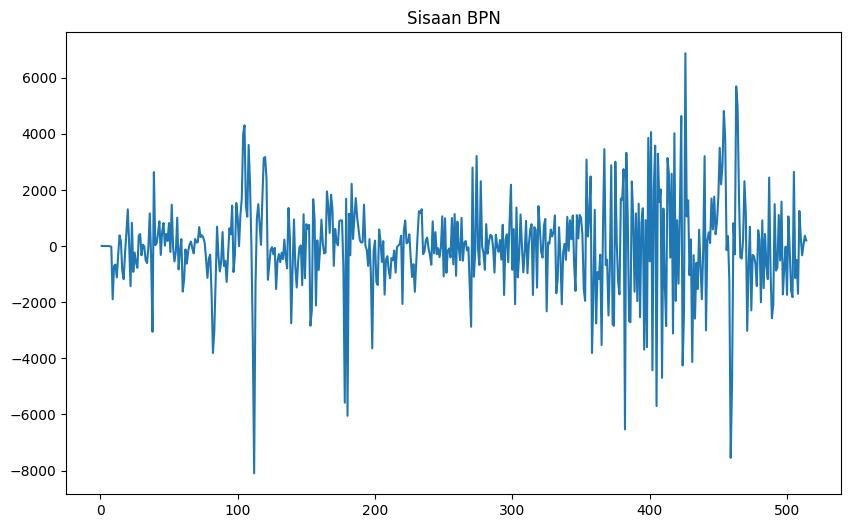

In [361]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,len(res)+1), res['x'])
plt.title('Sisaan BPN')
plt.show()

In [362]:
res_std = res['x']

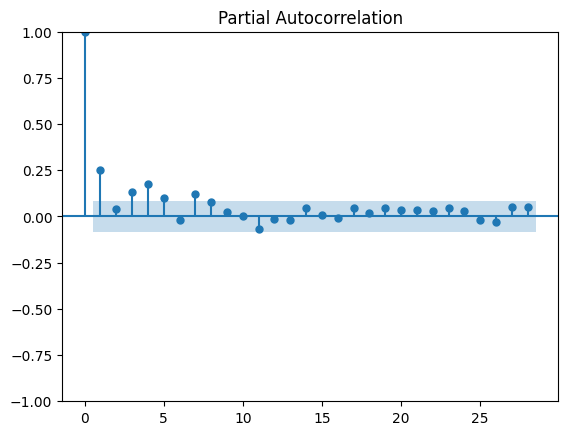

In [363]:
plot_pacf(np.array(res_std)**2)
plt.show()

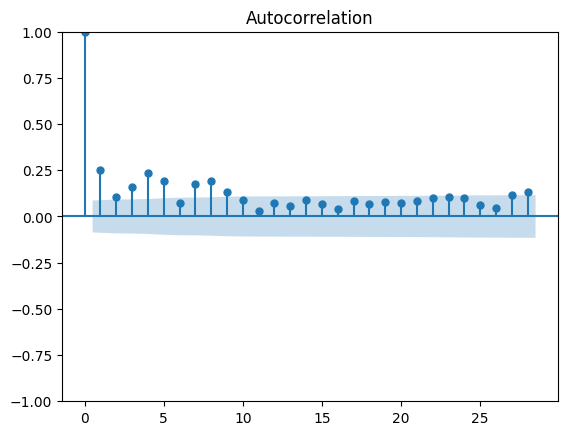

In [364]:
plot_acf(np.array(res_std)**2)
plt.show()

In [365]:
model_res = arch_model(res_std, vol='GARCH', p=1, o=0, q =1, mean='zero', dist='generalized error')
model_res_fit = model_res.fit()
model_res_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4528.097146247362
Iteration:      2,   Func. Count:     12,   Neg. LLF: 4447.128020802974
Iteration:      3,   Func. Count:     18,   Neg. LLF: 4445.443101132532
Iteration:      4,   Func. Count:     24,   Neg. LLF: 4452.159155028443
Iteration:      5,   Func. Count:     31,   Neg. LLF: 4445.260984782824
Iteration:      6,   Func. Count:     36,   Neg. LLF: 4445.260934960454
Iteration:      7,   Func. Count:     40,   Neg. LLF: 4445.260934960457
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4445.260934960454
            Iterations: 7
            Function evaluations: 40
            Gradient evaluations: 7


d:\IPB\5\MPDW\.venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.873e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Zero Mean - GARCH Model Results                              
==========================================================================================
Dep. Variable:                                  x   R-squared:                       0.000
Mean Model:                             Zero Mean   Adj. R-squared:                  0.002
Vol Model:                                  GARCH   Log-Likelihood:               -4445.26
Distribution:      Generalized Error Distribution   AIC:                           8898.52
Method:                        Maximum Likelihood   BIC:                           8915.49
                                                    No. Observations:                  514
Date:                            Fri, Oct 25 2024   Df Residuals:                      514
Time:                                    21:59:37   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.8742e+05  1.782e+05      1.613      0.107 [-6.189e+04,6.367e+05]
alpha[1]       0.4272      0.122      3.496  4.722e-04      [  0.188,  0.667]
beta[1]        0.5415      0.125      4.332  1.480e-05      [  0.296,  0.786]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             1.1947      0.125      9.543  1.381e-21 [  0.949,  1.440]
========================================================================

Covariance estimator: robust
"""

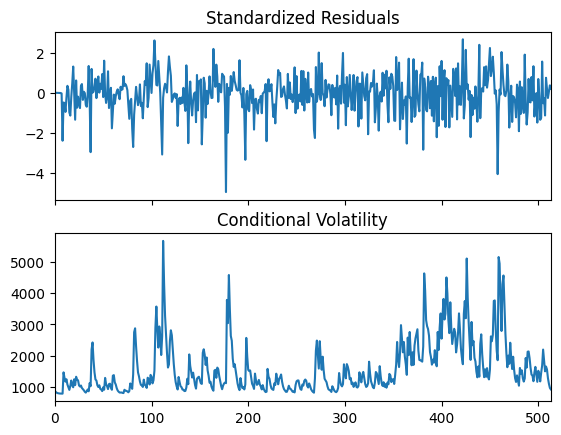

In [366]:
fig = model_res_fit.plot()


In [ ]:
## filter garch_stdresidual that values more than 3


In [367]:
garch_stresidual = model_res_fit.resid / model_res_fit.conditional_volatility

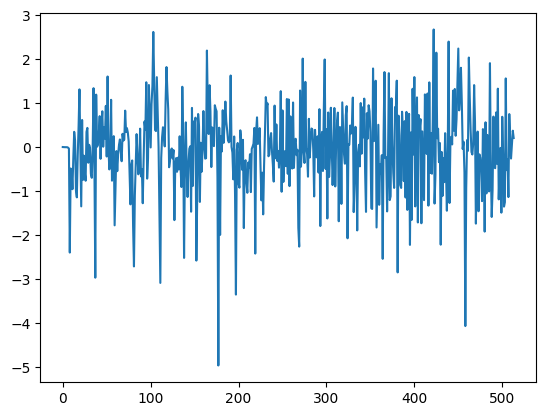

In [368]:
plt.plot(garch_stresidual)

In [129]:
# filter potetntial outliers
garch_stresidual[(garch_stresidual) > 2] = garch_stresidual.median()
garch_stresidual[(garch_stresidual) < -2] = garch_stresidual.median()

In [369]:
import statsmodels.api as sm
result_df = sm.stats.acorr_ljungbox(abs(garch_stresidual), return_df=True)
print(result_df)

      lb_stat  lb_pvalue
1    0.603397   0.437285
2    1.480899   0.476900
3    1.805252   0.613793
4    2.721136   0.605521
5    2.804886   0.730036
6    5.386034   0.495337
7    6.277340   0.507765
8    8.446588   0.391105
9    9.739044   0.372021
10  10.239630   0.419727


In [370]:
from scipy import stats
result_norm = stats.kstest(garch_stresidual, 'norm')
print(result_norm.pvalue)

0.033315651478272534


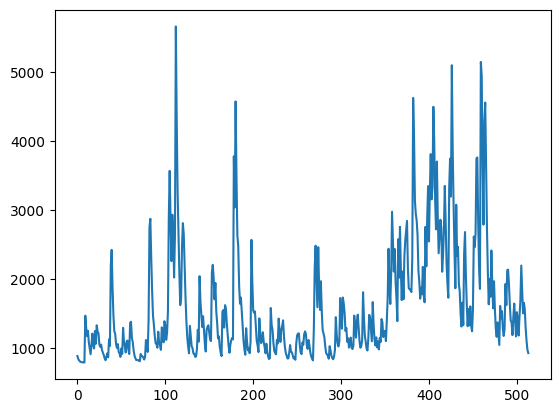

In [371]:
condvol = model_res_fit.conditional_volatility
plt.plot(condvol)

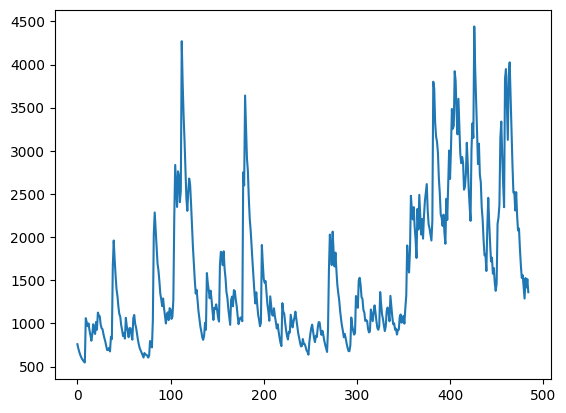

In [308]:
condvol_no_tf = model_res_fit.conditional_volatility
plt.plot(condvol_no_tf)

In [289]:
condvol_res = condvol * res['x'].std() + res['x'].mean()
condvol_res

0       804.420470
1       752.476950
2       716.254151
3       691.390330
4       674.532649
          ...     
480    1119.773942
481    1561.831726
482    1402.584332
483    1563.754662
484    1335.790834
Name: cond_vol, Length: 485, dtype: float64

In [372]:
condvol

0       886.289836
1       844.247550
2       820.580137
3       807.474292
4       800.287899
          ...     
509    1563.517478
510    1286.195130
511    1108.575907
512     976.744736
513     928.554464
Name: cond_vol, Length: 514, dtype: float64

In [373]:
condvol.to_csv("D:\\IPB\\5\\MPDW\\project\\4 garch try 2\\condvol_garch11_notf3.csv")

In [374]:
data_diff = res_std * 0.01

In [375]:
data_diff 

0      0.059427
1      0.039954
2      0.031556
3      0.027639
4      0.023867
         ...   
509    3.181684
510   -3.274069
511    0.528674
512    3.691959
513    1.967686
Name: x, Length: 514, dtype: float64

In [322]:
pred_long = model_res_fit.forecast(horizon=86)

In [329]:
pred_long.variance
pred_long_res = pd.DataFrame(np.sqrt(pred_long.variance.values[-1]), columns=['condvol'])
(pred_long_res)
pred_long_res.to_csv("D:\\IPB\\5\\MPDW\\project\\4 garch try 2\\pred_long_garch11.csv")

In [376]:
condvar_test = []
residual_test = []
test_size = 57
for i in range(test_size):
    train = data_diff[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    condvar_test.append(np.sqrt(pred.variance.values[-1,:][0]))
    residual_test.append(pred.residual_variance.values[-1,:][0])

In [266]:
residual_test = np.array(residual_test)

In [377]:
condvar_test = np.array(condvar_test)
condvar_test

array([22.62750662, 18.87682934, 48.28923947, 47.74225959, 38.40563977,
       30.74544678, 42.98178261, 46.20496939, 38.84865861, 31.27313275,
       25.22870446, 20.3498322 , 22.2344656 , 19.63599091, 23.76527864,
       19.72356041, 16.90962017, 19.11002993, 15.80674075, 13.29473531,
       11.69261422, 12.75343193, 11.69812336, 10.38445261, 14.42428838,
       13.69334471, 14.17154692, 12.48409485, 11.26662983, 11.61205547,
       18.26460692, 15.76301188, 19.54155163, 19.75619637, 18.91163004,
       16.2525651 , 14.12451471, 14.04570878, 12.15498457, 14.56427945,
       15.47176329, 13.53370485, 11.60814228, 13.77238951, 13.6633388 ,
       11.71152992, 13.26257816, 14.98291223, 20.676337  , 18.00064383,
       15.14192554, 15.7011035 , 15.50266962, 13.35780222, 11.5216183 ,
       10.13973786,  9.52619531])

In [378]:
condvar_test_result = condvar_test * 100
condvar_test_result = pd.DataFrame(condvar_test_result)

In [379]:
condvar_test_result.to_csv("D:\\IPB\\5\\MPDW\\project\\4 garch try 2\\predict_test_garch11_notf3.csv")

In [247]:
scaled_res = residual_test * res['x'].std() + res['x'].mean()

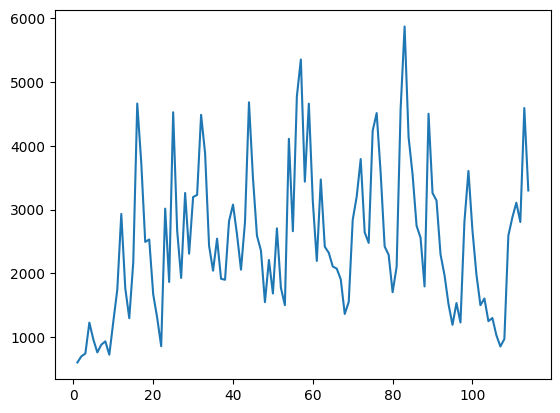

In [250]:
plt.plot(range(1, test_size+1), scaled_res)

In [239]:
scaled_res.shape

(114,)

In [268]:
scaled_res = pd.DataFrame(scaled_res)
scaled_res.to_csv("D:\\IPB\\5\\MPDW\\project\\2 garch try\\condvar_test_rnorm.csv")